In [153]:
import os, sys
import numpy as np
import scipy
import scipy.sparse as sps
import csv
from scipy.optimize import leastsq
from scipy.sparse import csr_matrix,lil_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full_data = np.genfromtxt('../../data/ml-100k/ml-100k/u1.base', delimiter='\t')

In [41]:
# columns: user_id, item_id, rating
train_data = np.delete(full_data,-1,1)
test_data = np.genfromtxt('../../data/ml-100k/ml-100k/u1.test', delimiter='\t')
test_data = np.delete(test_data,-1,1)

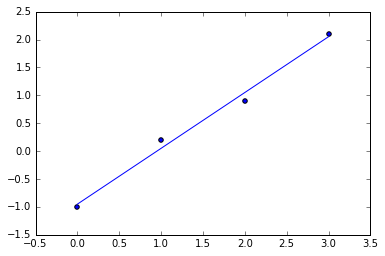

In [4]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T

def get_func(params):
    m,c = params
    func = lambda x: m*x + c
    return(func)

error_function = lambda params,x,y: get_func(params)(x) - y

initial_params = (1.0,1.0)

final_params,success = leastsq(error_function,initial_params,args =(x,y) )

final_params

plt.scatter(x,y)
plt.plot(x,get_func(final_params)(x))

plt.show()


In [61]:
np.random.rand(10)

array([ 0.6446229 ,  0.03760365,  0.9051811 ,  0.00628294,  0.32692841,
        0.65019959,  0.60888012,  0.71775236,  0.48664285,  0.73202522])

In [173]:
users = train_data[:,0]
items = train_data[:,1]
unique_users = np.unique(train_data[:,0])
unique_items = np.unique(train_data[:,1])

A = np.zeros(  int(users.max())*int(items.max()) ).reshape((int(users.max()),int(items.max())))

# element (i,j) refers to user i+1 and item j+1
for row in train_data:
    user_id,item_id,rating = row
   
    A[int(user_id-1),int(item_id-1)] = rating

global_item_average = items.mean()    

# let's use the item averages to fill missing values
item_averages = np.zeros(int(items.max()))

for (item_id,column) in enumerate(A.T):
    nonzeros = np.array(list(filter(lambda elem: elem != 0.0,column)))
    
    # if the item hasn't been rated yet, assign it the global average 
    if(len(nonzeros)==0):
        item_avg = global_item_average
    else:
        item_avg = nonzeros.mean()
    
    item_averages[item_id-1] = item_avg
    
user_component,s,item_component = np.linalg.svd(A,full_matrices=False)

In [179]:
user_component.shape, item_component.shape,s.shape

((943, 943), (943, 1682), (943,))

In [180]:
user_component[0].shape,np.diag(s).shape,item_component[0].shape

((943,), (943, 943), (1682,))

In [181]:
SE = 0.0

# reconstructed matrix
A_hat = np.dot(np.dot(user_component,np.diag(s)),item_component)

for row in test_data:
    user_id = int(row[0])
    item_id = int(row[1])
    rating = row[2]
    
    i = user_id-1
    j = item_id-1
    
    user_feature_vector = user_component[i]
    item_feature_vector = item_component.T[j]
   
    rating_hat = A_hat[i][j]

    squared_error = (rating - rating_hat) ** 2
    
    SE += squared_error
    
MSE = SE/len(test_data)
RMSE = np.sqrt(MSE)
RMSE    

3.7193413395384942

In [34]:
error_sq = 0.0

for row in train_data:
    user_id = int(row[0])
    item_id = int(row[1])
    rating = row[2]
    
    i = user_id-1
    j = item_id-1
    
    user_feature_vector = user_component[i]
    item_feature_vector = item_component[j]
          
    rating_hat = user_feature_vector.dot(item_feature_vector.T)[0,0]
    
    error_sq += (rating - rating_hat) ** 2
              
error_sq
    
#     error = (rating - rating_hat)
    
#     error_squared = error ** 2
    
#     print(error_squared)
    


# # def get_func(params):

# fixed_u_component


727965.48913275986